In [44]:
#loading library
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 


In [45]:
# loading the data set for training 
fashion_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()


In [46]:
#train_images

In [47]:
class_names = ['T-shirt/top', 'Trouser', ' Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
#explore data set
train_images.shape,  test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [49]:
len(train_labels), len(test_labels)

(60000, 10000)

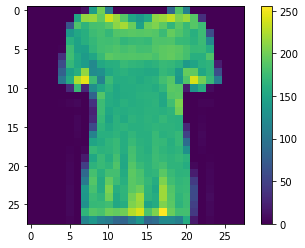

In [50]:
#Display one of the image in dataset 
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
#Data preprocessing 

train_images = train_images/255
test_images = test_images/255

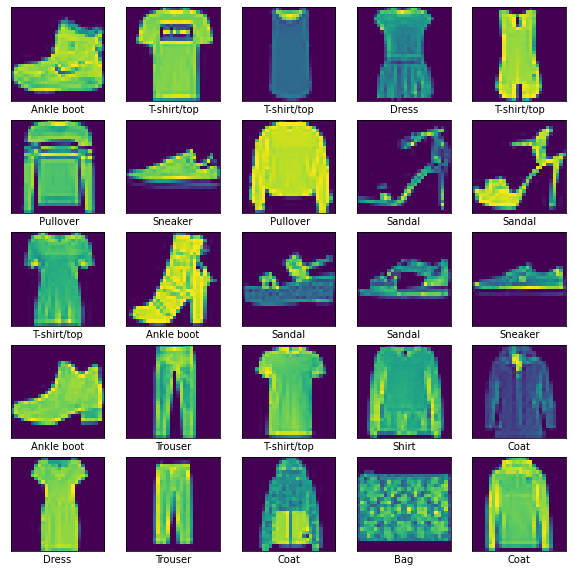

In [52]:
#visualize of data set with class name 
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()    


In [53]:
#build the model 
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'), 
        tf.keras.layers.Dense(10)
         ])

In [54]:
#compilee the model 
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'] 
             )

In [55]:
#training our model 
model.fit(train_images,train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4960 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3706 - accuracy: 0.8674
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3363 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3093 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2943 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2805 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2649 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2452 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

In [56]:
# evaluating model 
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("\n test accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8811

 test accuracy: 0.8810999989509583


In [57]:
#Making predictions 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [58]:
predictions = probability_model. predict (test_images)

In [59]:
predictions[10]

array([6.1889754e-05, 5.8871988e-06, 5.8327843e-02, 1.9432962e-06,
       9.0820527e-01, 7.2138922e-09, 3.3393666e-02, 1.3058892e-07,
       3.1302238e-06, 8.4943899e-08], dtype=float32)

In [60]:
np.argmax(predictions[0])

9

In [61]:
test_labels[0]

9